In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils as u
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
def load_file_names(bs_fldr, in_fldr):
    return [os.path.join(in_fldr, f) for f in os.listdir(os.path.join(bs_fldr, in_fldr)) if f.endswith('.npy')]

# Test 0 results

1) per leader results. Make a table with auc. As this is per leader result we don't need to produce recall

2) table is 10x3 in size. For every leader we have diff people, faceswap and imposters


In [11]:

table_0 = test_0()
display(table_0.head(100))


auc_res1, conf_mat1 = test_1()
display(auc_res1.head(100))
display(conf_mat1.head(100))


auc_res2, conf_mat2 = test_2()
display(auc_res2.head(100))
display(conf_mat2.head(100))


auc_res3, conf_mat3 = test_3()
display(auc_res3.head(100))
display(conf_mat3.head(100))


auc_res4, conf_mat4 = test_4()
display(auc_res4.head(100))
display(conf_mat4.head(100))


bo diff auc: 0.99749992
bo faceswap auc: 0.7192424657534247
bo imposter auc: 0.9908712662337663
bs diff auc: 0.9971307999999999
bs faceswap auc: 0.9281358400000002
bs imposter auc: 0.8517631147540984
ew diff auc: 0.99959916
ew faceswap auc: 0.9709576884755895
ew imposter auc: 0.9213097271648872
hc diff auc: 0.9828831200000001
hc faceswap auc: 0.7231521604938271
hc imposter auc: 0.6430267716535433
dt diff auc: 0.95520288
dt faceswap auc: 0.6201714181553044
dt imposter auc: 0.7092011996001333
jb diff auc: 0.9879686399999998
cb diff auc: 0.9863204000000001
pb diff auc: 0.99744676
kh diff auc: 0.9994106000000001
br diff auc: 0.9926307999999999
bo diff auc: 0.99777788
bo faceswap auc: 0.8848511741682974
bo imposter auc: 0.883144724025974
bs diff auc: 0.9971062800000001
bs faceswap auc: 0.9485055999999998
bs imposter auc: 0.992989856557377
ew diff auc: 0.99956612
ew faceswap auc: 0.9586886084357356
ew imposter auc: 0.9411801304863583
hc diff auc: 0.9832920399999999
hc faceswap auc: 0.4060743

,diff,faceswap,imposter,leader_name
0,0.999282,0.987665,0.992399,bo
1,0.999904,0.945867,0.987063,bs
2,0.983189,1.000000,1.000000,ew
3,0.977582,0.997455,0.990889,hc
4,0.948661,0.999601,0.999642,dt
5,0.998588,NaN,NaN,jb
6,0.987604,NaN,NaN,cb
7,0.999602,NaN,NaN,pb
8,0.999954,NaN,NaN,kh
9,0.999760,NaN,NaN,br


,diff,faceswap,imposter,leader_name
0,0.997457,0.986559,0.992612,bo
1,0.996136,0.941564,0.987310,bs
2,0.999339,0.999598,0.999958,ew
3,0.984567,0.747460,0.983042,hc
4,0.956316,0.879784,0.909629,dt
5,0.989061,NaN,NaN,jb
6,0.987014,NaN,NaN,cb
7,0.997534,NaN,NaN,pb
8,0.999063,NaN,NaN,kh
9,0.992172,NaN,NaN,br


pred_name,bo,br,bs,cb,dt,ew,hc,jb,kh,pb
true_name,,,,,,,,,,
FF_orig,0.112000,0.061600,0.022400,0.065200,0.030800,0.049200,0.205800,0.085000,0.205800,0.162200
bo,0.998800,NaN,NaN,0.000600,NaN,0.000400,NaN,0.000200,NaN,NaN
bo_faceswap,0.834638,0.022505,NaN,0.138454,NaN,0.004403,NaN,NaN,NaN,NaN
bo_imposter,0.568182,0.028409,NaN,0.383929,0.002435,0.013393,NaN,0.002435,NaN,0.001218
br,0.001000,0.999000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000200,NaN,0.999600,NaN,0.000200,NaN,NaN,NaN,NaN,NaN
bs_faceswap,0.006400,NaN,0.771200,0.164800,NaN,NaN,NaN,0.057600,NaN,NaN
bs_imposter,0.047131,NaN,0.530225,0.015369,0.027664,NaN,0.000512,0.379098,NaN,NaN
cb,0.001200,NaN,NaN,0.978200,NaN,NaN,NaN,0.020600,NaN,NaN


,diff,faceswap,imposter,leader_name
0,0.997500,0.719242,0.990871,bo
1,0.997131,0.928136,0.851763,bs
2,0.999599,0.970958,0.921310,ew
3,0.982883,0.723152,0.643027,hc
4,0.955203,0.620171,0.709201,dt
5,0.987969,NaN,NaN,jb
6,0.986320,NaN,NaN,cb
7,0.997447,NaN,NaN,pb
8,0.999411,NaN,NaN,kh
9,0.992631,NaN,NaN,br


pred_name,bo,bo_imposter,br,bs,bs_imposter,cb,dt,dt_imposter,ew,ew_imposter,hc,hc_imposter,jb,kh,pb
true_name,,,,,,,,,,,,,,,
FF_orig,0.099600,0.002000,0.048600,0.020200,0.000600,0.067600,0.026400,NaN,0.058800,0.001200,0.193000,0.038800,0.081200,0.196600,0.165400
bo,0.999200,NaN,NaN,NaN,NaN,0.000400,NaN,NaN,0.000400,NaN,NaN,NaN,NaN,NaN,NaN
bo_faceswap,0.413405,0.408023,0.027886,NaN,NaN,0.149706,NaN,NaN,0.000978,NaN,NaN,NaN,NaN,NaN,NaN
bo_imposter,0.523945,0.042614,0.028409,NaN,NaN,0.377841,0.006088,NaN,0.017857,NaN,NaN,NaN,0.002029,NaN,0.001218
br,0.001000,NaN,0.999000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000800,NaN,NaN,0.999200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs_faceswap,0.000800,NaN,NaN,0.658400,0.139200,0.184000,NaN,NaN,NaN,NaN,NaN,NaN,0.017600,NaN,NaN
bs_imposter,0.009734,NaN,NaN,0.195697,0.509734,0.022029,0.010246,NaN,NaN,NaN,NaN,NaN,0.252561,NaN,NaN
cb,0.001200,NaN,NaN,NaN,NaN,0.975600,NaN,NaN,NaN,NaN,NaN,NaN,0.023200,NaN,NaN


,diff,faceswap,imposter,leader_name
0,0.997778,0.884851,0.883145,bo
1,0.997106,0.948506,0.992990,bs
2,0.999566,0.958689,0.941180,ew
3,0.983292,0.406074,0.820979,hc
4,0.956066,0.731645,0.798783,dt
5,0.989461,NaN,NaN,jb
6,0.986064,NaN,NaN,cb
7,0.997564,NaN,NaN,pb
8,0.999165,NaN,NaN,kh
9,0.993053,NaN,NaN,br


pred_name,bo,bo_faceswap,br,bs,cb,dt,dt_faceswap,ew,ew_faceswap,hc,hc_faceswap,jb,kh,pb
true_name,,,,,,,,,,,,,,
FF_orig,0.100600,0.006600,0.062000,0.022400,0.056800,0.029800,0.006400,0.052600,NaN,0.175600,0.041400,0.083200,0.207000,0.155600
bo,0.999600,0.000200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000200,NaN,NaN
bo_faceswap,0.413894,0.492172,0.017123,NaN,0.071429,NaN,NaN,0.005382,NaN,NaN,NaN,NaN,NaN,NaN
bo_imposter,0.295860,0.389610,0.030032,NaN,0.278409,NaN,NaN,0.006088,NaN,NaN,NaN,NaN,NaN,NaN
br,0.002200,NaN,0.997800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000400,NaN,NaN,0.999000,NaN,0.000600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs_faceswap,0.000800,NaN,NaN,0.796800,0.164000,NaN,NaN,NaN,NaN,NaN,NaN,0.038400,NaN,NaN
bs_imposter,0.027152,NaN,NaN,0.509221,0.028176,0.016906,0.044570,NaN,NaN,0.000512,NaN,0.373463,NaN,NaN
cb,0.002000,NaN,NaN,NaN,0.974800,NaN,NaN,NaN,NaN,NaN,NaN,0.023200,NaN,NaN


,FF_Deepfakes,FF_FaceSwap,FF_NeuralTextures,leader_name
0,0.6215,0.552,0.500367,FF_orig


pred_name,FF_orig
true_name,
FF_Deepfakes,1.0
FF_FaceSwap,1.0
FF_NeuralTextures,1.0
FF_orig,1.0


In [13]:
conf_mat5 = test_5()
display(conf_mat5.head(100))

pred_name,FF_FaceSwap,FF_orig
true_name,,
FF_Deepfakes,0.434335,0.565665
FF_FaceSwap,0.547448,0.452552
FF_NeuralTextures,0.356103,0.643897
FF_orig,0.367813,0.632187


In [27]:

auc_res_int1, conf_mat_int1 = test_interview1()
display(auc_res_int1.head(100))
display(conf_mat_int1.head(100))


auc_res_int2, conf_mat_int2 = test_interview2()
display(auc_res_int2.head(100))
display(conf_mat_int2.head(100))

,diff,faceswap,imposter,leader_name
0,0.970506,0.433384,0.634291,bo_interview


pred_name,bo
true_name,
FF_orig,1.0
bo_faceswap,1.0
bo_imposter,1.0
bo_interview,1.0
br,1.0
bs,1.0
cb,1.0
dt,1.0
ew,1.0


,diff,faceswap,imposter,leader_name
0,0.986221,0.601159,0.739472,bo_interview


pred_name,bo,bo_interview
true_name,,
FF_orig,0.631001,0.368999
bo_faceswap,0.704501,0.295499
bo_imposter,0.687500,0.312500
bo_interview,0.324296,0.675704
br,0.971869,0.028131
bs,0.580183,0.419817
cb,0.713222,0.286778
dt,0.644355,0.355645
ew,0.957811,0.042189


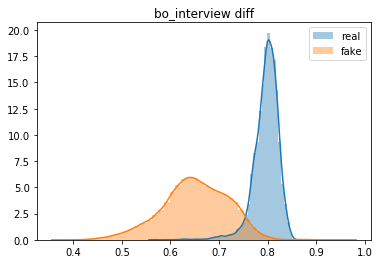

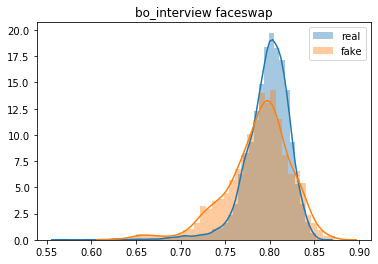

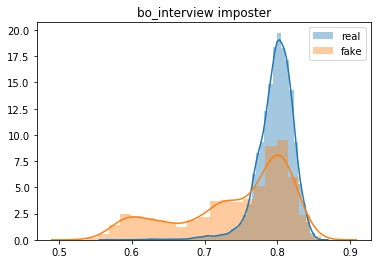

,diff,faceswap,imposter,leader_name
0,0.984416,0.586024,0.718146,bo_interview


pred_name,bo,bo_interview
true_name,,
FF_orig,0.653227,0.346773
bo_faceswap,0.717710,0.282290
bo_imposter,0.673295,0.326705
bo_interview,0.247984,0.752016
br,0.971958,0.028042
bs,0.586592,0.413408
cb,0.802041,0.197959
dt,0.645089,0.354911
ew,0.944988,0.055012


In [33]:
auc_res_int2, conf_mat_int2 = test_interview2()
display(auc_res_int2.head(100))
display(conf_mat_int2.head(100))

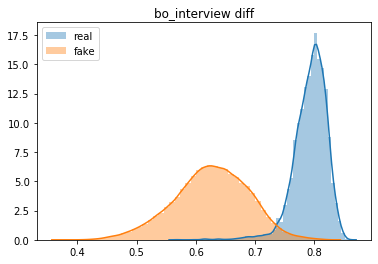

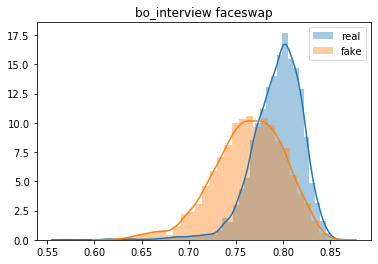

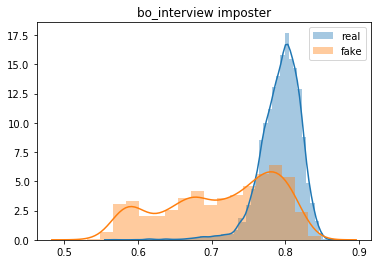

,diff,faceswap,imposter,leader_name
0,0.993049,0.747638,0.834399,bo_interview


pred_name,bo_interview
true_name,
FF_orig,1.0
bo,1.0
bo_faceswap,1.0
bo_imposter,1.0
bo_interview,1.0
br,1.0
bs,1.0
cb,1.0
dt,1.0


In [37]:
auc_res_int2, conf_mat_int2 = test_interview2()
display(auc_res_int2.head(100))
display(conf_mat_int2.head(100))

# vox celeb 

1) gather the data into labels 

2) find recall


In [49]:
# build the repo
# collect the files with which repo needs to build    
# construct a class with these file names to read the embeddings
# I need the embeddings, each embedding should have a label and a name, filename
# for each label get N embeddings to keep in the repo
def build_vox_ref(bs_fldr, file_dict, N):

    # for each unique label
    full_emb_df = {}
    all_keys = np.sort(list(file_dict.keys()))
    for k in range(len(all_keys)):

        label = []
        names = []
        all_feat = {}
        for f in file_dict[all_keys[k]]:

            feat = np.load(os.path.join(bs_fldr, f))
            idx = np.random.choice(range(len(feat)), N)
            all_feat[f] = feat[idx, :]

        all_feat = np.vstack(list(all_feat.values()))
        cur_df = pd.DataFrame(data=np.zeros((len(all_feat), 1), dtype=np.int32)+k, columns=['label'])
        cur_df['name'] = all_keys[k]
        cur_df['emb'] = all_feat.tolist()
        full_emb_df[k] = cur_df

    # then for each file read all the files 
    return pd.concat(list(full_emb_df.values()), ignore_index=True, sort=False)

def get_voxceleb_dict():
    
    # add folders to the test label dict
    bsfldr = '/data/home/shruti/voxceleb/fabnet_metric/vox2_test_mp4'
    all_files = np.array([np.array([f[:7], f]) for f in os.listdir(bsfldr) if f.endswith('.npy')])
        
    # the first 7 letters are of the ids, this is used as labels 
    [uniq_labels, uniq_ids, uniq_cnts] = np.unique(all_files[:, 0], return_inverse=True, return_counts=True)
    print(f'number of labels {len(uniq_labels)}')
    
    # create the dictionary
    label_file_dict = {}
    for i in range(len(uniq_labels)):
        
        label_file_dict[i] = all_files[uniq_ids==i, 1]
        print(f'id: {uniq_labels[i]} lbl: {i} len: {len(label_file_dict[i])}')

    return label_file_dict
    
    
def recall_at_k(in_emb, in_label, k):
    
    sim_mat = np.matmul(in_emb, np.transpose(in_emb))
    m = len(sim_mat)
    match_counter = 0
    for i in range(m):
        pos_sim = sim_mat[i][in_label == in_label[i]]
        neg_sim = sim_mat[i][in_label != in_label[i]]

        thresh = np.sort(pos_sim)[-2]

        if np.sum(neg_sim > thresh) < k:
            match_counter += 1
    return float(match_counter) / m

In [50]:

vox_lbl_dict = get_voxceleb_dict()
    
# add folders to the test label dict
vox_repo = build_vox_ref('/data/home/shruti/voxceleb/fabnet_metric/vox2_test_mp4', vox_lbl_dict, N=1)

number of labels 118
id: id00017 lbl: 0 len: 166
id: id00061 lbl: 1 len: 267
id: id00081 lbl: 2 len: 281
id: id00154 lbl: 3 len: 168
id: id00419 lbl: 4 len: 454
id: id00562 lbl: 5 len: 224
id: id00812 lbl: 6 len: 380
id: id00817 lbl: 7 len: 406
id: id00866 lbl: 8 len: 258
id: id00926 lbl: 9 len: 139
id: id01000 lbl: 10 len: 140
id: id01041 lbl: 11 len: 366
id: id01066 lbl: 12 len: 247
id: id01106 lbl: 13 len: 346
id: id01224 lbl: 14 len: 425
id: id01228 lbl: 15 len: 324
id: id01298 lbl: 16 len: 451
id: id01333 lbl: 17 len: 405
id: id01437 lbl: 18 len: 242
id: id01460 lbl: 19 len: 336
id: id01509 lbl: 20 len: 391
id: id01541 lbl: 21 len: 372
id: id01567 lbl: 22 len: 453
id: id01593 lbl: 23 len: 476
id: id01618 lbl: 24 len: 184
id: id01822 lbl: 25 len: 211
id: id01892 lbl: 26 len: 121
id: id01989 lbl: 27 len: 154
id: id02019 lbl: 28 len: 272
id: id02057 lbl: 29 len: 402
id: id02086 lbl: 30 len: 435
id: id02181 lbl: 31 len: 137
id: id02286 lbl: 32 len: 144
id: id02317 lbl: 33 len: 464
id:

In [51]:
print('recall at 1 {}'.format(recall_at_k(np.array(list(vox_repo['emb'])), vox_repo['label'], 1)))
print('recall at 5 {}'.format(recall_at_k(np.array(list(vox_repo['emb'])), vox_repo['label'], 5)))
print('recall at 10 {}'.format(recall_at_k(np.array(list(vox_repo['emb'])), vox_repo['label'], 10)))

recall at 1 0.9569369259777386
recall at 5 0.9750623441396509
recall at 10 0.9814792287573748


# full imposter data

In [52]:

# train and test split
def train_test_imposter_full(bs_fldr):

    train_ldr_dict = u.load_dict_file('/data/home/shruti/voxceleb/motion_signature/data/utils/leaders_100_train.txt')
    test_ldr_dict = u.load_dict_file('/data/home/shruti/voxceleb/motion_signature/data/utils/leaders_100_test.txt')

    # add folders to the test label dict
    fake_name = ['bo_imposter', 'bs_imposter', 
                  'ew_imposter', 'dt_imposter', 'hc_imposter']

    # test and train fakes
    for k in fake_name:
        cur_files = load_file_names(bs_fldr, k)
        cur_files = np.sort(cur_files)
        
        # partition
        n1 = int(len(cur_files))
        n2 = len(cur_files) - n1
        
        train_ldr_dict[k] = cur_files[:n1]
        test_ldr_dict[k] = cur_files[n1:]
            
    # add folders to the test label dict
    fake_name = ['bo_faceswap', 
                  'bs_faceswap', 'ew_faceswap', 'dt_faceswap', 
                  'hc_faceswap', 'FF_orig']

    # test and train fakes
    for k in fake_name:
        cur_files = load_file_names(bs_fldr, k)
        cur_files = np.sort(cur_files)
        
        # partition
        n1 = int(0.1*len(cur_files))
        n2 = len(cur_files) - n1
        
        train_ldr_dict[k] = cur_files[:n1]
        test_ldr_dict[k] = cur_files[n1:]
        
    return train_ldr_dict, test_ldr_dict


def test_full_imposter():
    
    bs_fldr = '/data/home/shruti/voxceleb/fabnet_metric/'
    train_files, test_files = train_test_imposter_full(bs_fldr)

    # these are the table values
    train_ldrs = ['bo', 'bs', 'ew', 'hc', 'dt', 'jb', 'cb', 'pb', 'kh', 'br', 
                  'bo_imposter', 'bs_imposter', 'dt_imposter', 'ew_imposter', 'hc_imposter']
    test_ldrs =  ['bo', 'br', 'bs', 'cb', 'dt', 'ew', 'hc', 'jb', 'kh', 'pb', 'FF_orig', 
                  'bo_faceswap', 'bs_faceswap', 'dt_faceswap', 
                  'ew_faceswap', 'hc_faceswap']
    
    train_repo = build_ref(bs_fldr, {f: train_files[f] for f in train_ldrs}, 10000)
    test_repo = build_ref(bs_fldr, {f: test_files[f] for f in test_ldrs}, 5000)
    
    full_results = get_results(train_repo, test_repo)
    
    
    # these are the table values
    train_cases = ['bo', 'bs', 'ew', 'hc', 'dt', 'jb', 'cb', 'pb', 'kh', 'br']
    test_names = ['diff', 'faceswap']
    test_cases =  [[['FF_orig'], ['bo_faceswap']],
                  [['FF_orig'], ['bs_faceswap']],
                  [['FF_orig'], ['dt_faceswap'] ],
                  [['FF_orig'], ['ew_faceswap']],
                  [['FF_orig'], ['hc_faceswap'] ],
                  [['FF_orig']],
                  [['FF_orig']],
                  [['FF_orig']],
                  [['FF_orig']], 
                  [['FF_orig']] ]

    # for each case
    results = np.zeros((len(train_cases), len(test_names))) + np.nan
    for l in range(len(train_cases)):

        pos_dist = np.array(full_results['dist'][full_results['true_name']==train_cases[l]])        
        for t in range(len(test_cases[l])):
            
            neg_dist = np.array(full_results['dist'][full_results['true_name'].isin(test_cases[l][t])])

            pred = np.log(np.concatenate([pos_dist, neg_dist], axis=0))
            lbl = np.concatenate([np.ones_like(pos_dist), np.zeros_like(neg_dist)])
            fpr, tpr, thresholds = roc_curve(lbl, pred)
            results[l, t] = auc(fpr, tpr)
            #print(f'{train_ldrs[l]} {test_names[t]} auc: {results[l, t]}')

    results_df = pd.DataFrame(data=results, columns=test_names)
    results_df['leader_name'] = train_cases
    
    # pivot table
    confusion_mat = full_results.pivot_table(values='dist', 
                                   index='true_name', columns='pred_name', aggfunc=lambda x: len(x))
    confusion_mat = confusion_mat/np.nansum(np.array(confusion_mat), axis=1, keepdims=True)
    
    return results_df, confusion_mat

auc_res_fimp, conf_mat_fimp = test_full_imposter()
display(auc_res_fimp.head(100))
display(conf_mat_fimp.head(100))

,diff,faceswap,leader_name
0,0.996809,0.133974,bo
1,0.996268,0.701008,bs
2,0.999262,0.688758,ew
3,0.992044,0.496097,hc
4,0.951463,0.079800,dt
5,0.988296,NaN,jb
6,0.986276,NaN,cb
7,0.997387,NaN,pb
8,0.998960,NaN,kh
9,0.992205,NaN,br


pred_name,bo,bo_imposter,br,bs,bs_imposter,cb,dt,dt_imposter,ew,ew_imposter,hc,hc_imposter,jb,kh,pb
true_name,,,,,,,,,,,,,,,
FF_orig,0.077800,0.034600,0.0488,0.0144,0.0088,0.0516,0.020600,0.013600,0.039800,0.011200,0.1484,0.1336,0.073200,0.1774,0.1462
bo,0.998600,NaN,NaN,NaN,NaN,0.0002,NaN,NaN,0.001000,NaN,NaN,NaN,0.000200,NaN,NaN
bo_faceswap,0.000489,0.999511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
br,0.001000,NaN,0.9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000200,NaN,NaN,0.9994,NaN,NaN,0.000200,NaN,NaN,NaN,NaN,NaN,0.000200,NaN,NaN
bs_faceswap,NaN,NaN,NaN,0.0296,0.9704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cb,NaN,NaN,NaN,NaN,NaN,0.9740,NaN,0.003400,NaN,NaN,NaN,NaN,0.022600,NaN,NaN
dt,0.000600,NaN,NaN,0.0002,NaN,0.0152,0.949400,0.016600,0.000200,NaN,NaN,NaN,0.017600,NaN,0.0002
dt_faceswap,NaN,NaN,NaN,NaN,NaN,NaN,0.001328,0.995682,NaN,NaN,NaN,NaN,0.002989,NaN,NaN
